Пожалуйста, подготовьте домашние задания в Jupyter:
1. Скачайте CSV-файл с открытым исходным кодом набора данных (вы можете выбрать любой), загрузите его с помощью Pandas, изучите его, при необходимости выполните предварительную обработку, а затем примените готовую (КАКУЮ) классификацию KNN.
2. Примените классификатор KNN из scikit-learn к набору данных Iris и оцените точность. Экспериментируйте с различными значениями k и точностью построения графика (КАКОГО). Визуализируйте границы принятия решений, используя две функции (что  набора данных Iris.
3. Используйте алгоритм DROP5 для набора данных Iris и сравните метрики точности, используя масштабирующие устройства (например, min-max, Standard или Robust) для набора данных.
4. Вместо классического KNN используйте алгоритмы «Быстрый поиск ближайших соседей», «Навигируемые графы малого мира (HSNW)» и «Поиск схожести Facebook AI (FAISS)». Сравните метрику точности.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


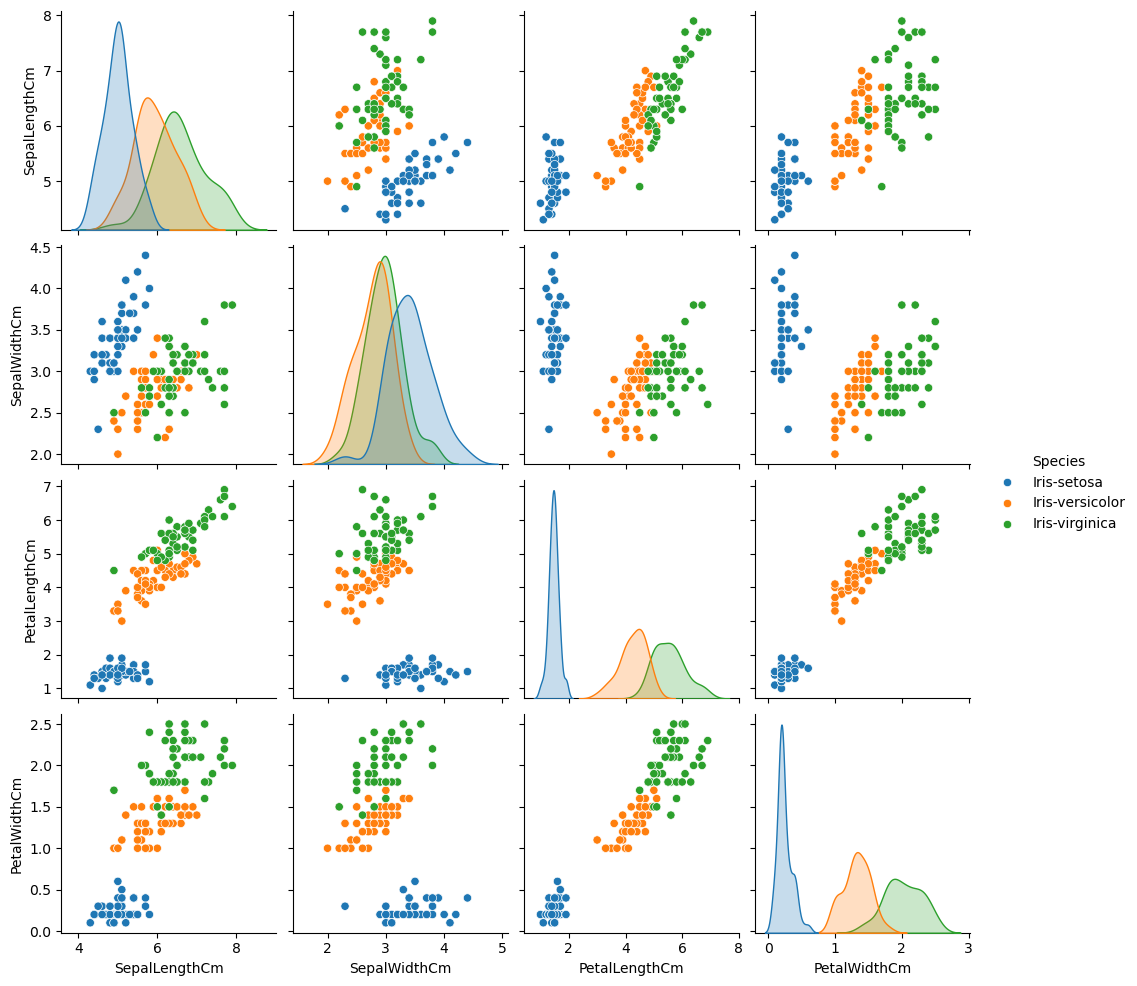

In [6]:
sns.pairplot(data=df,vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species')

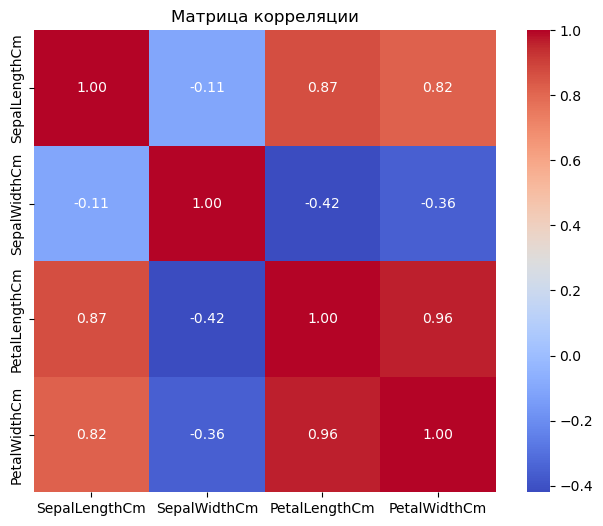

In [7]:
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Матрица корреляции')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Разбиение на обучающий и тестовый наборы данных, масштабирование данных, обучение модели

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Species',axis=1)
y = df['Species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = knn.predict(scaled_X_test)

In [15]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [18]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Построение модели с помощью классов

In [19]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
import numpy as np
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        Stores the training data.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        return self
        
    def predict(self, X_test):
        """
        Vectorized prediction for better performance.
        """
        X_test = np.array(X_test)
        predictions = np.array([self._predict_single(x) for x in X_test])
        return predictions
    
    def _predict_single(self, x):
        """
        Optimized prediction for single instance.
        """
        # Векторизованное вычисление расстояний
        if self.metric == 'euclidean':
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        else:  # manhattan
            distances = np.sum(np.abs(self.X_train - x), axis=1)
        
        # Находим k ближайших соседей
        k_indices = np.argpartition(distances, self.k)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        
        # Находим наиболее частую метку
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        return unique[np.argmax(counts)]
    
    def score(self, X_test, y_test):
        """
        Returns accuracy score.
        """
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)


In [21]:
knn2 = KNearestNeighbors(k=5)
knn2.fit(scaled_X_train, y_train)
y_pred = knn2.predict(scaled_X_test)

In [22]:
accuracy = knn2.score(scaled_X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"Predictions: {y_pred[:10]}") 
print(f"True labels: {y_test.values[:10]}")  

Accuracy: 1.0000
Predictions: [1 0 2 1 1 0 1 2 1 1]
True labels: [1 0 2 1 1 0 1 2 1 1]


# Подбор гиперпараметра:
1) Метод локтя
2) Поиск по сетке grid search
3) LOO

In [23]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

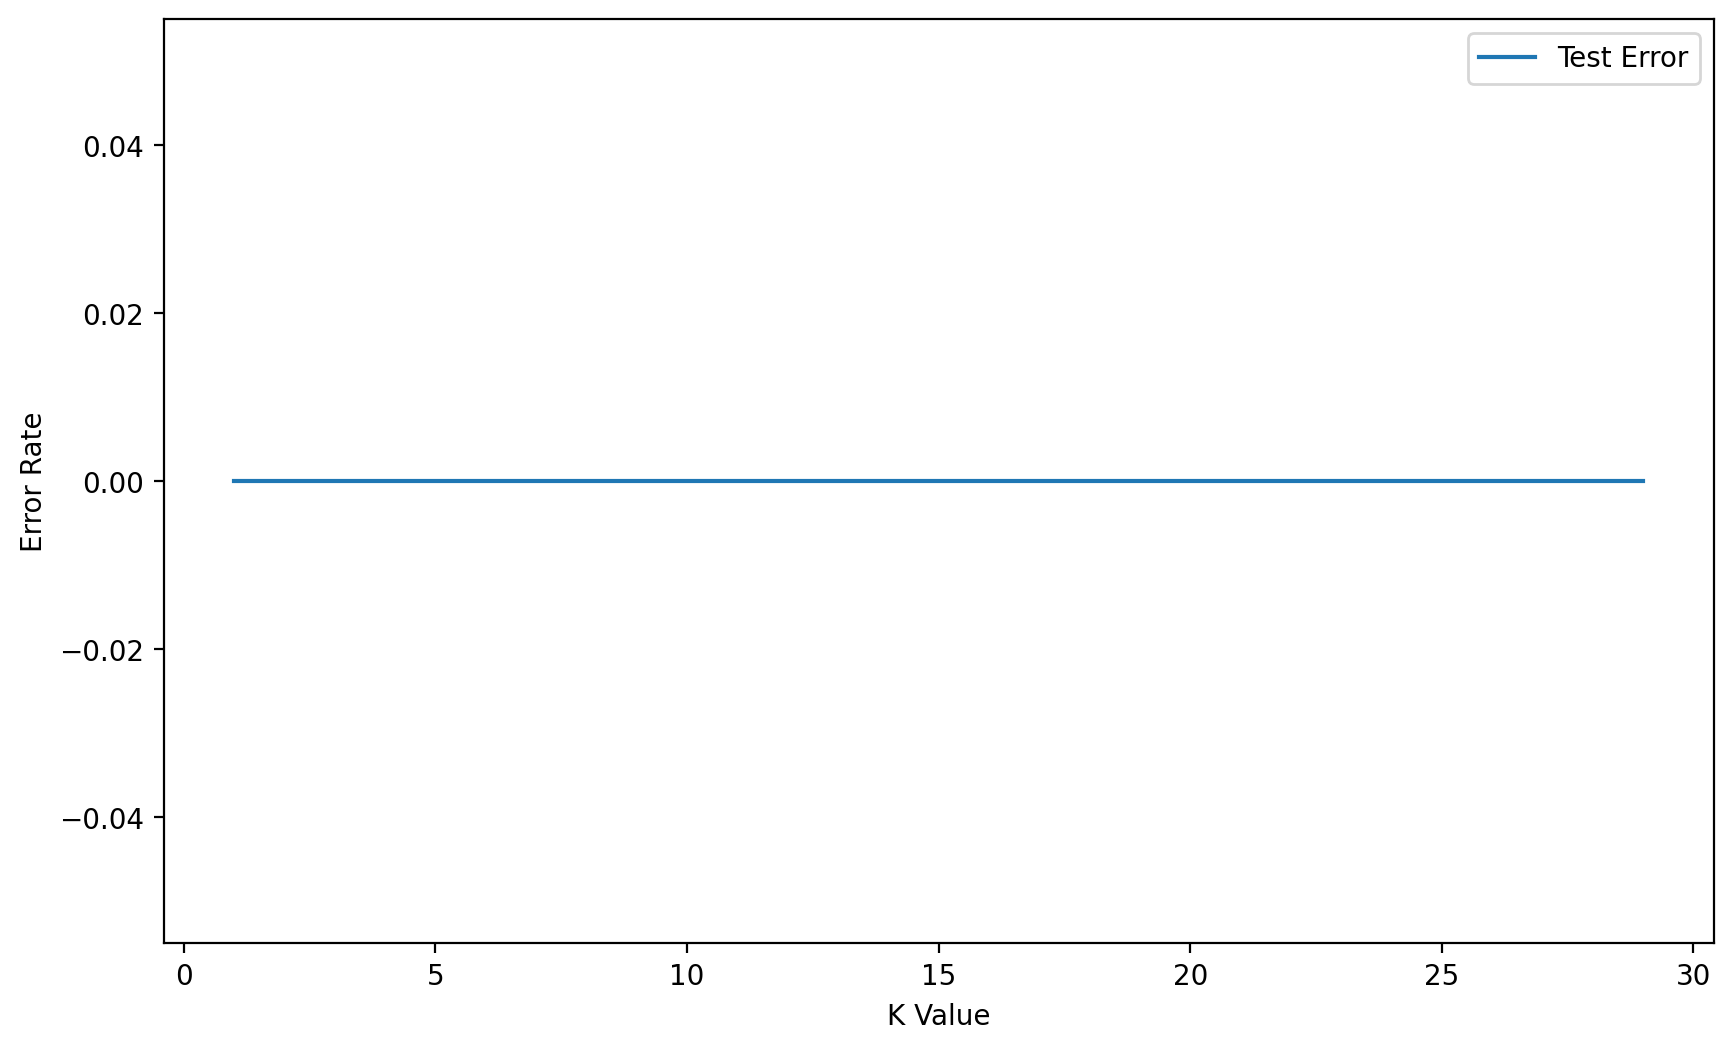

In [24]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [25]:
accuracy_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
    y_pred_test = knn_model.predict(scaled_X_test)
    
    acc=accuracy_score(y_test,y_pred_test)
    accuracy_rates.append(acc)
    


Text(0.5, 0, 'K Value')

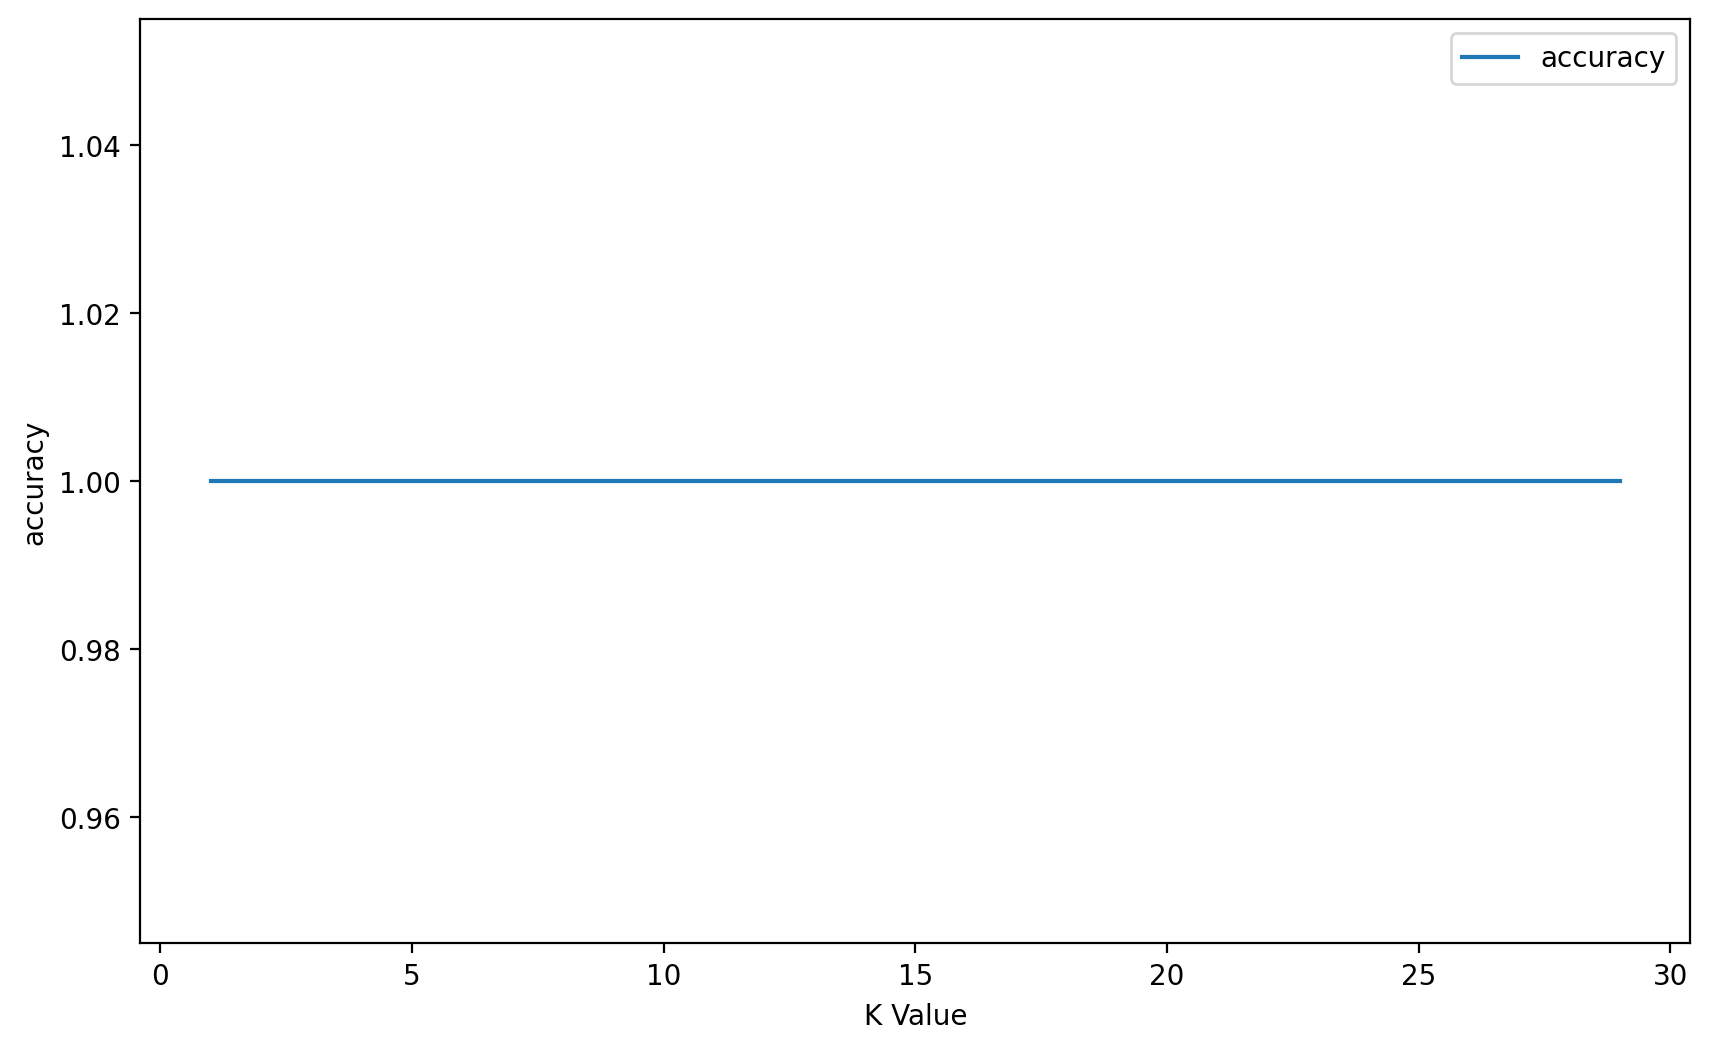

In [26]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),accuracy_rates,label='accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel("K Value")

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': list(range(1, 30))}  

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    scoring='accuracy',
    cv=5  
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['knn__n_neighbors']

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best k: 3
Best cross-validation score: 0.9905


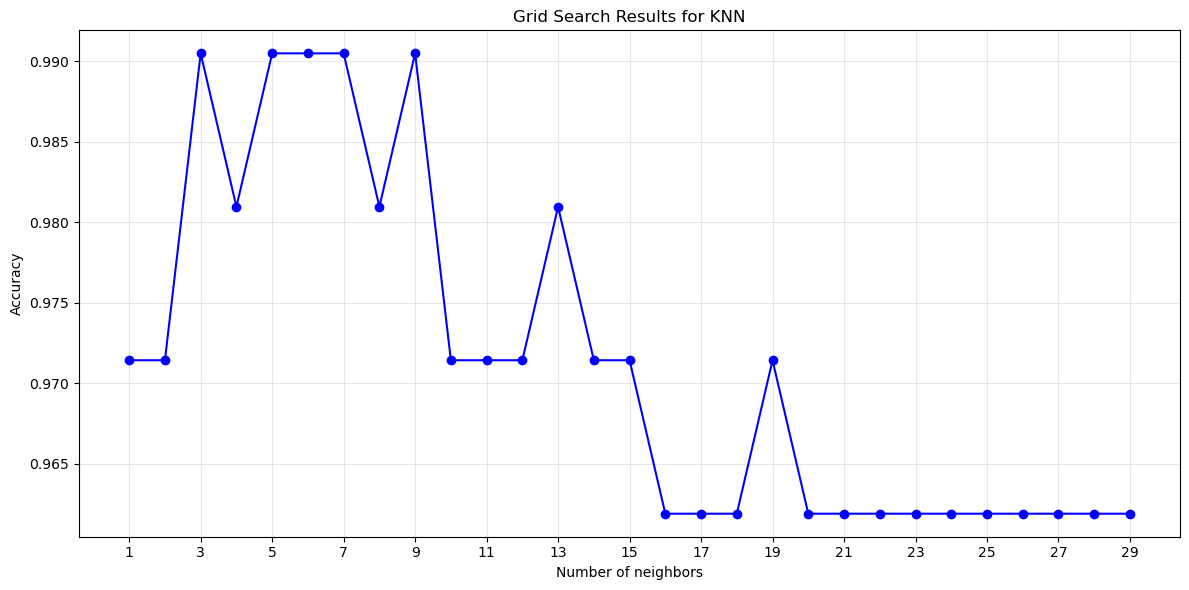

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(param_grid['knn__n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search Results for KNN')
plt.grid(True, alpha=0.3)
plt.xticks(param_grid['knn__n_neighbors'][::2])  # Подписи через один для читаемости
plt.tight_layout()
plt.show()

Финальная модель: метод GridSearch рекомендует значение K=4, снова применим PipeLine на тестовом наборе данных

In [30]:
scaler = StandardScaler()
knn4 = KNeighborsClassifier(n_neighbors=4)
operations = [('scaler',scaler),('knn4',knn4)]
pipe = Pipeline(operations)
pipe.fit(X_train,y_train)
pipe_pred = pipe.predict(X_test)
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [31]:
single_sample = X_test.iloc[[5]]

In [32]:
single_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
31,32,5.4,3.4,1.5,0.4


In [33]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [34]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [35]:
predicted_value = pipe.predict(single_sample.values.reshape(1, -1))
true_value = y_test.iloc[5]

# Выводим оба значения
print(f"\nПредсказанное значение целевой переменной: {predicted_value[0]}")
print(f"Тестовое значение целевой переменной: {true_value}")


Предсказанное значение целевой переменной: 0
Тестовое значение целевой переменной: 0


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# LOO

In [36]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

In [37]:
def loo_hyperparameter_tuning(X, y, param_name, param_values, model_class):
    """
    LOO для подбора гиперпараметров
    
    Parameters:
    X - признаки
    y - целевая переменная
    param_name - имя параметра для настройки
    param_values - список значений параметра
    model_class - класс модели
    """
    
    loo = LeaveOneOut()
    results = {}
    
    # Для каждого значения гиперпараметра
    for param_value in param_values:
        accuracies = []
        
        # LOO цикл
        for train_idx, test_idx in loo.split(X):
            # Разделение данных
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Масштабирование (внутри каждого фолда!)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Создание и обучение модели с текущим гиперпараметром
            model = model_class(**{param_name: param_value})
            model.fit(X_train_scaled, y_train)
            
            # Предсказание и оценка точности
            y_pred = model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        # Сохраняем среднюю точность для этого значения параметра
        results[param_value] = np.mean(accuracies)
        print(f"Parameter {param_name}={param_value}: Mean Accuracy = {results[param_value]:.4f}")
    
    return results



In [38]:
param_name = 'n_neighbors' 
param_values = list(range(1, 30))
results = loo_hyperparameter_tuning(X, y, param_name, param_values, KNeighborsClassifier)
best_param = max(results, key=results.get)
best_score = results[best_param]
print(f"\nBest {param_name}: {best_param}")

Parameter n_neighbors=1: Mean Accuracy = 0.9867
Parameter n_neighbors=2: Mean Accuracy = 0.9867
Parameter n_neighbors=3: Mean Accuracy = 0.9933
Parameter n_neighbors=4: Mean Accuracy = 0.9933
Parameter n_neighbors=5: Mean Accuracy = 0.9933
Parameter n_neighbors=6: Mean Accuracy = 0.9933
Parameter n_neighbors=7: Mean Accuracy = 0.9933
Parameter n_neighbors=8: Mean Accuracy = 0.9933
Parameter n_neighbors=9: Mean Accuracy = 0.9933
Parameter n_neighbors=10: Mean Accuracy = 0.9867
Parameter n_neighbors=11: Mean Accuracy = 0.9933
Parameter n_neighbors=12: Mean Accuracy = 0.9933
Parameter n_neighbors=13: Mean Accuracy = 0.9933
Parameter n_neighbors=14: Mean Accuracy = 0.9933
Parameter n_neighbors=15: Mean Accuracy = 0.9933
Parameter n_neighbors=16: Mean Accuracy = 0.9867
Parameter n_neighbors=17: Mean Accuracy = 0.9933
Parameter n_neighbors=18: Mean Accuracy = 0.9867
Parameter n_neighbors=19: Mean Accuracy = 0.9933
Parameter n_neighbors=20: Mean Accuracy = 0.9867
Parameter n_neighbors=21: Mea

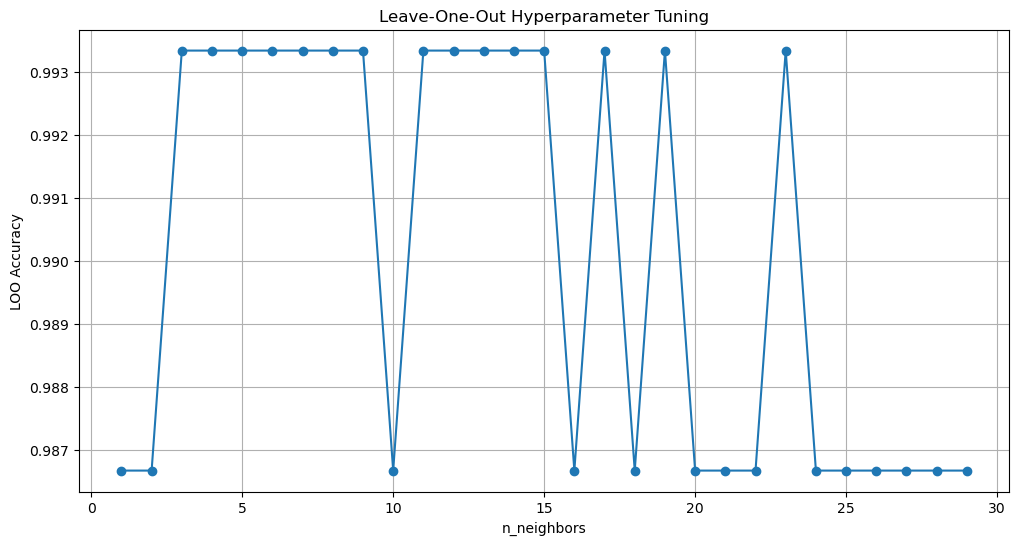

In [39]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-')
plt.xlabel('n_neighbors')
plt.ylabel('LOO Accuracy')
plt.title('Leave-One-Out Hyperparameter Tuning')
plt.grid(True)
plt.show()

# k-fold validation

In [40]:
from sklearn.model_selection import cross_val_score, KFold

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
k = KFold(n_splits = 30)
score = cross_val_score(knn, scaled_X_train, y_train, scoring = 'accuracy').mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.99


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
k_values = range(1, 31)  # Проверяем k от 1 до 30
best_score = 0
best_k = 0
scores = []

In [46]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Кросс-валидация с KFold
    cv_scores = cross_val_score(knn, scaled_X_train, y_train, 
                               cv=kfold, scoring='accuracy')
    
    mean_score = cv_scores.mean()
    scores.append(mean_score)
    
    print(f"k={k}: Accuracy = {round(mean_score, 3)}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"\nЛучший параметр: k={best_k}")
print(f"Лучшая точность: {round(best_score, 3)}")

k=1: Accuracy = 0.962
k=2: Accuracy = 0.981
k=3: Accuracy = 0.99
k=4: Accuracy = 0.99
k=5: Accuracy = 0.99
k=6: Accuracy = 0.981
k=7: Accuracy = 0.981
k=8: Accuracy = 0.981
k=9: Accuracy = 0.99
k=10: Accuracy = 0.981
k=11: Accuracy = 0.981
k=12: Accuracy = 0.971
k=13: Accuracy = 0.981
k=14: Accuracy = 0.971
k=15: Accuracy = 0.99
k=16: Accuracy = 0.981
k=17: Accuracy = 0.99
k=18: Accuracy = 0.981
k=19: Accuracy = 0.981
k=20: Accuracy = 0.971
k=21: Accuracy = 0.971
k=22: Accuracy = 0.971
k=23: Accuracy = 0.962
k=24: Accuracy = 0.952
k=25: Accuracy = 0.962
k=26: Accuracy = 0.962
k=27: Accuracy = 0.962
k=28: Accuracy = 0.943
k=29: Accuracy = 0.943
k=30: Accuracy = 0.943

Лучший параметр: k=3
Лучшая точность: 0.99


In [47]:
from matplotlib.colors import ListedColormap

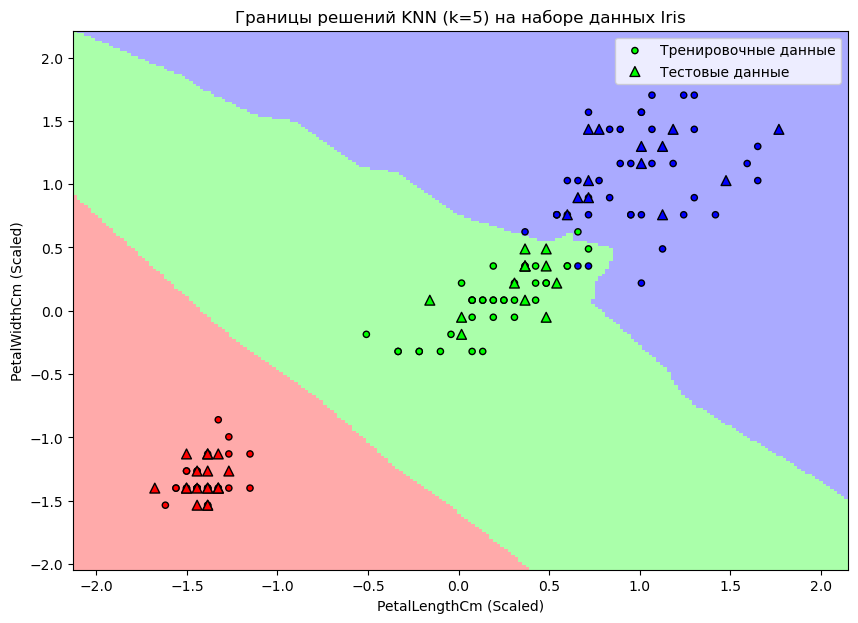

In [48]:
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Заменяем текстовые метки классов на числовые для совместимости с Matplotlib
# Это важно, так как цветовая карта работает с числами
class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y_numeric = y.map(class_mapping)

# Разделение данных и масштабирование
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Обучение классификатора
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train, y_train)

# Создание сетки для построения границ
x_min, x_max = scaled_X_train[:, 0].min() - 0.5, scaled_X_train[:, 0].max() + 0.5
y_min, y_max = scaled_X_train[:, 1].min() - 0.5, scaled_X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Предсказание класса для каждой точки на сетке
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Визуализация границ решений
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Нанесение тренировочных и тестовых точек на график
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Тренировочные данные')
plt.scatter(scaled_X_test[:, 0], scaled_X_test[:, 1], c=y_test, cmap=cmap_bold,
            marker='^', edgecolor='k', s=50, label='Тестовые данные')

# Добавление названий и легенды
plt.title("Границы решений KNN (k=5) на наборе данных Iris")
plt.xlabel('PetalLengthCm (Scaled)')
plt.ylabel('PetalWidthCm (Scaled)')
plt.legend()
plt.show()

In [49]:
def drop5_reduction(X_train, y_train, k=5):
  
    X_train_np = X_train.values
    y_train_np = y_train.values
    n_samples = len(X_train_np)
    
    remaining_indices = list(range(n_samples))
    utilities = np.zeros(n_samples)
    
    # Эффективное вычисление полезности
    for i in range(n_samples):
        # Вычисляем расстояния до всех других точек
        distances = np.linalg.norm(X_train_np - X_train_np[i], axis=1)
        
        # Находим расстояния до соседей ДРУГОГО класса
        different_class_indices = np.where(y_train_np != y_train_np[i])[0]
        different_class_distances = distances[different_class_indices]
        
        # Берем k-ое расстояние
        if len(different_class_distances) >= k:
            different_class_distances.sort()
            utilities[i] = different_class_distances[k-1]
        else:
            utilities[i] = np.inf # Бесконечность, чтобы не удалять эти точки

    # Сортируем точки по полезности (от наименьшей к наибольшей)
    sorted_indices = np.argsort(utilities)
    
    current_indices = set(remaining_indices)
    
    for idx in sorted_indices:
        if len(current_indices) <= 1:
            break
        
        # Временно удаляем точку
        temp_indices = list(current_indices - {idx})
        temp_X = X_train_np[temp_indices]
        temp_y = y_train_np[temp_indices]
        
        # Обучаем временную модель
        temp_knn = KNeighborsClassifier(n_neighbors=k)
        temp_knn.fit(temp_X, temp_y)
        
        # Проверяем точность на оставшихся точках
        original_X = X_train_np[list(current_indices)]
        original_y = y_train_np[list(current_indices)]
        
        accuracy_without = temp_knn.score(original_X, original_y)
        accuracy_with = KNeighborsClassifier(n_neighbors=k).fit(
            original_X, original_y
        ).score(original_X, original_y)
        
        # Если точность не ухудшилась, удаляем точку
        if accuracy_without >= accuracy_with * 0.95:
            current_indices.remove(idx)
            
    reduced_indices = list(current_indices)
    return X_train.iloc[reduced_indices], y_train.iloc[reduced_indices]

In [50]:
# Сравнение разных scaler'ов
scalers = {
    'Without Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

results = []

for scaler_name, scaler in scalers.items():
    print(f"\n {scaler_name}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        # Для случая без масштабирования
        X_train_scaled = X_train.values
        X_test_scaled = X_test.values
    
    # Применение DROP5. Передаем DataFrame для сохранения индексов
    X_reduced_df, y_reduced_df = drop5_reduction(
        X_train, y_train, k=5
    )
    
    # Преобразуем сокращенные DataFrame обратно в numpy массивы для fit
    if scaler:
        X_reduced_scaled = scaler.transform(X_reduced_df)
    else:
        X_reduced_scaled = X_reduced_df.values
    
    print(f"Original size: {len(X_train)}")
    print(f"Reduced size: {len(X_reduced_df)}")
    print(f"Reduction: {100*(1-len(X_reduced_df)/len(X_train)):.1f}%")
    
    knn_original = KNeighborsClassifier(n_neighbors=5)
    knn_reduced = KNeighborsClassifier(n_neighbors=5)
    
    knn_original.fit(X_train_scaled, y_train)
    acc_original = accuracy_score(y_test, knn_original.predict(X_test_scaled))
    
    knn_reduced.fit(X_reduced_scaled, y_reduced_df)
    acc_reduced = accuracy_score(y_test, knn_reduced.predict(X_test_scaled))
    
    results.append({
        'Scaler': scaler_name,
        'Original Size': len(X_train),
        'Reduced Size': len(X_reduced_df),
        'Reduction %': 100*(1-len(X_reduced_df)/len(X_train)),
        'Accuracy Original': acc_original,
        'Accuracy Reduced': acc_reduced,
        'Accuracy Difference': acc_reduced - acc_original
    })
    
    print(f"Accuracy (original): {acc_original:.4f}")
    print(f"Accuracy (reduced): {acc_reduced:.4f}")




 Without Scaling
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9333
Accuracy (reduced): 0.9111

 StandardScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9333

 MinMaxScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9333

 RobustScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9111


 метод DROP5 увеличивает accuracy - долю верных ответов при  StandardScaler и MinMaxScaler стандартизациях

# Быстрый поиск ближайших соседей  BallTree

In [51]:
df = pd.read_csv('Iris.csv')
X = df.drop('Species', axis=1)
y = df['Species']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [55]:
y_pred = knn.predict(scaled_X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [57]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# Быстрый поиск ближайших соседей KD_tree

In [58]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn.fit(scaled_X_train, y_train)

# Предсказание
y_pred = knn.predict(scaled_X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# «Навигируемые графы малого мира (HSNW)» 

In [60]:
import nmslib
from collections import Counter

In [65]:

index = nmslib.init(method='hnsw', space='l2', data_type=nmslib.DataType.DENSE_VECTOR)
index.addDataPointBatch(scaled_X_train)
index.createIndex({'M': 16, 'efConstruction': 100, 'post': 0}, print_progress=True)

# Функция для предсказания с использованием HNSW
def predict_hnsw(index, X_test, y_train, k=3):
    # Поиск k ближайших соседей для всех тестовых точек
    results = index.knnQueryBatch(X_test, k=k)
    
    # Предсказание меток на основе большинства голосов
    y_pred = []
    for result in results:
        indices, distances = result  # Распаковываем кортеж
        neighbor_labels = [y_train.iloc[i] for i in indices]
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    
    return np.array(y_pred)

y_pred = predict_hnsw(index, scaled_X_test, y_train, k=3)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Результаты HNSW ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))


=== Результаты HNSW ===
Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# «Поиск схожести Facebook AI (FAISS)

In [68]:
import faiss

In [70]:
dimension = scaled_X_train.shape[1] 

index = faiss.IndexFlatL2(dimension)

index.add(scaled_X_train)

In [71]:
k = 3
distances, indices = index.search(scaled_X_test, k)

In [72]:
y_pred_faiss = []
for neighbor_indices in indices:
    neighbor_labels = [y_train.iloc[i] for i in neighbor_indices]
    most_common = Counter(neighbor_labels).most_common(1)[0][0]
    y_pred_faiss.append(most_common)
    

In [73]:
accuracy = accuracy_score(y_test, y_pred_faiss)
print("=== FAISS Results ===")
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_faiss))

=== FAISS Results ===
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

